## Importing Dependencies

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import io

In [13]:
print("Files in gfc.zip:")
print("=" * 50)

with zipfile.ZipFile("gfc.zip", "r") as outer_zip:
    for name in outer_zip.namelist():
        if name.endswith(".csv"):
            print(f" {name}")
        elif name.endswith(".zip"):
            print(f" {name}")
            nested_zip_data = outer_zip.read(name)
            with zipfile.ZipFile(io.BytesIO(nested_zip_data), "r") as inner_zip:
                for inner_name in inner_zip.namelist():
                    if inner_name.endswith(".csv"):
                        print(f"  📄 {inner_name}")

Files in gfc.zip:
 gfc data/AIG.csv
 gfc data/^VIX.csv
 gfc data/C.csv
 gfc data/JPM.csv
 gfc data/^GSPC.csv
 gfc data/WGS3MO.csv
 gfc data/^DJI.csv
 gfc data/TEDRATE.csv


In [16]:
with zipfile.ZipFile("gfc.zip") as z:
    with z.open("gfc data/WGS3MO.csv") as f:
        # Read the first few rows
        sample = pd.read_csv(f, nrows=10)
        print(f"\n All columns in token_transfers.csv:")
        print(sample.columns.tolist())
        print(f"\n First 10 rows:")
        print(sample)


 All columns in token_transfers.csv:
['observation_date', 'WGS3MO']

 First 10 rows:
  observation_date  WGS3MO
0       2005-01-07    2.32
1       2005-01-14    2.35
2       2005-01-21    2.37
3       2005-01-28    2.41
4       2005-02-04    2.50
5       2005-02-11    2.51
6       2005-02-18    2.59
7       2005-02-25    2.69
8       2005-03-04    2.75
9       2005-03-11    2.76


# Financial Sector \(Individual Bank Stocks\)

## American International Group \(AIG\)

In [22]:
zip_file_path = "gfc.zip"
csv_file_in_zip = "gfc data/AIG.csv"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_in_zip) as f:
        # Load the AIG.csv file. Let pandas infer the header from the first row.
        # This will use ['Price', 'Close', 'High', 'Low', 'Open', 'Volume'] as headers.
        df_aig = pd.read_csv(f)

df_aig = df_aig.iloc[2:].copy()
df_aig.rename(columns={'Price': 'Date'}, inplace=True)
df_aig['Date'] = pd.to_datetime(df_aig['Date'])

for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    df_aig[col] = pd.to_numeric(df_aig[col], errors='coerce')

df_aig.dropna(subset=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], inplace=True)
df_aig.set_index('Date', inplace=True)

display(df_aig.head())

,Close,High,Low,Open,Volume
Date,,,,,
2005-01-03,789.595642,799.520880,788.878183,790.432726,379590
2005-01-04,792.226868,799.999660,790.552699,793.422682,379110
2005-01-05,805.380432,812.674866,796.651008,797.607644,558800
2005-01-06,806.695984,812.435949,799.999456,801.195269,408765
2005-01-07,808.130920,811.718362,804.304302,807.772191,311070


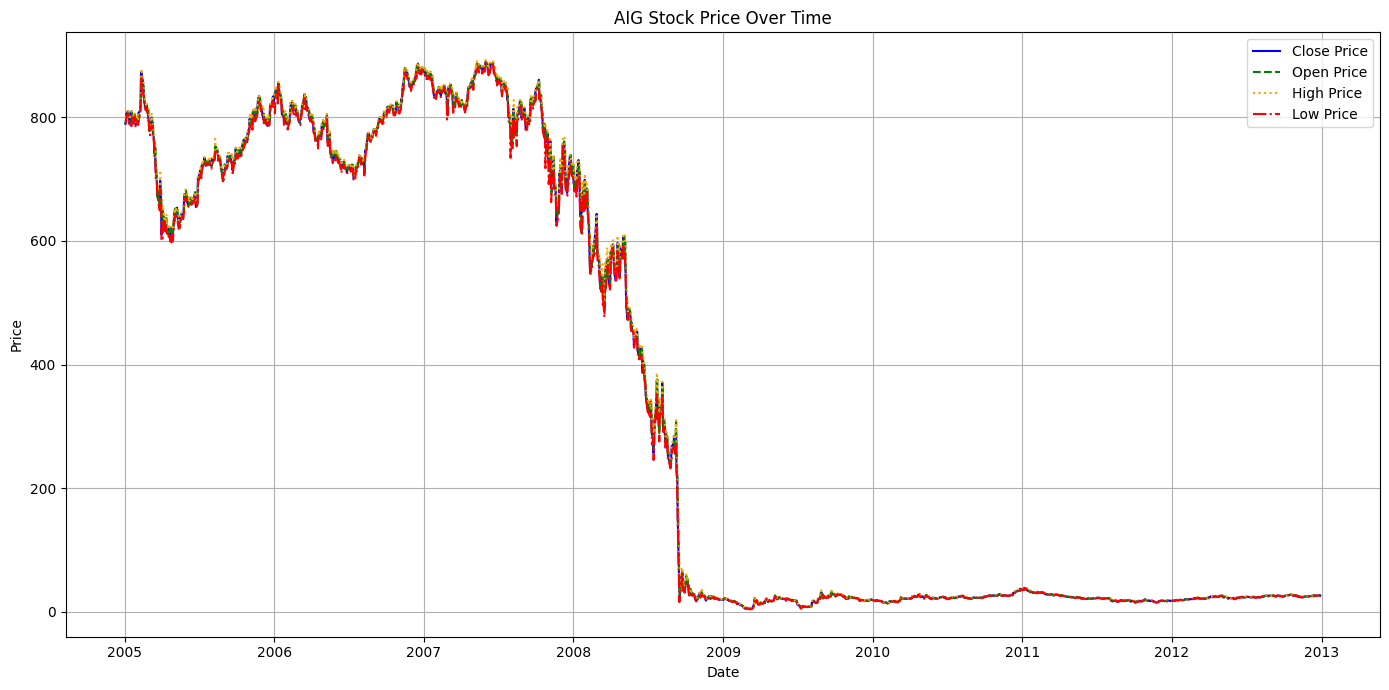

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df_aig.index, df_aig['Close'], label='Close Price', color='blue')
plt.plot(df_aig.index, df_aig['Open'], label='Open Price', color='green', linestyle='--')
plt.plot(df_aig.index, df_aig['High'], label='High Price', color='orange', linestyle=':')
plt.plot(df_aig.index, df_aig['Low'], label='Low Price', color='red', linestyle='-.')

plt.title('AIG Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Citigroup Inc\.

In [28]:
csv_file_in_zip_C = "gfc data/C.csv"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_in_zip_C) as f:
        df_c = pd.read_csv(f)

df_c = df_c.iloc[2:].copy()

df_c.rename(columns={'Price': 'Date'}, inplace=True)

df_c['Date'] = pd.to_datetime(df_c['Date'])

for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    df_c[col] = pd.to_numeric(df_c[col], errors='coerce')

df_c.dropna(subset=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], inplace=True)
df_c.set_index('Date', inplace=True)

display(df_c.head())

,Close,High,Low,Open,Volume
Date,,,,,
2005-01-03,299.300537,303.826931,298.866491,303.826931,1474660
2005-01-04,296.758362,302.400867,295.766270,299.362582,1584770
2005-01-05,300.478668,302.462833,297.750430,297.936439,1893350
2005-01-06,303.392761,305.314935,302.214661,302.586698,1804990
2005-01-07,301.656769,304.509026,301.346741,304.447016,1280370


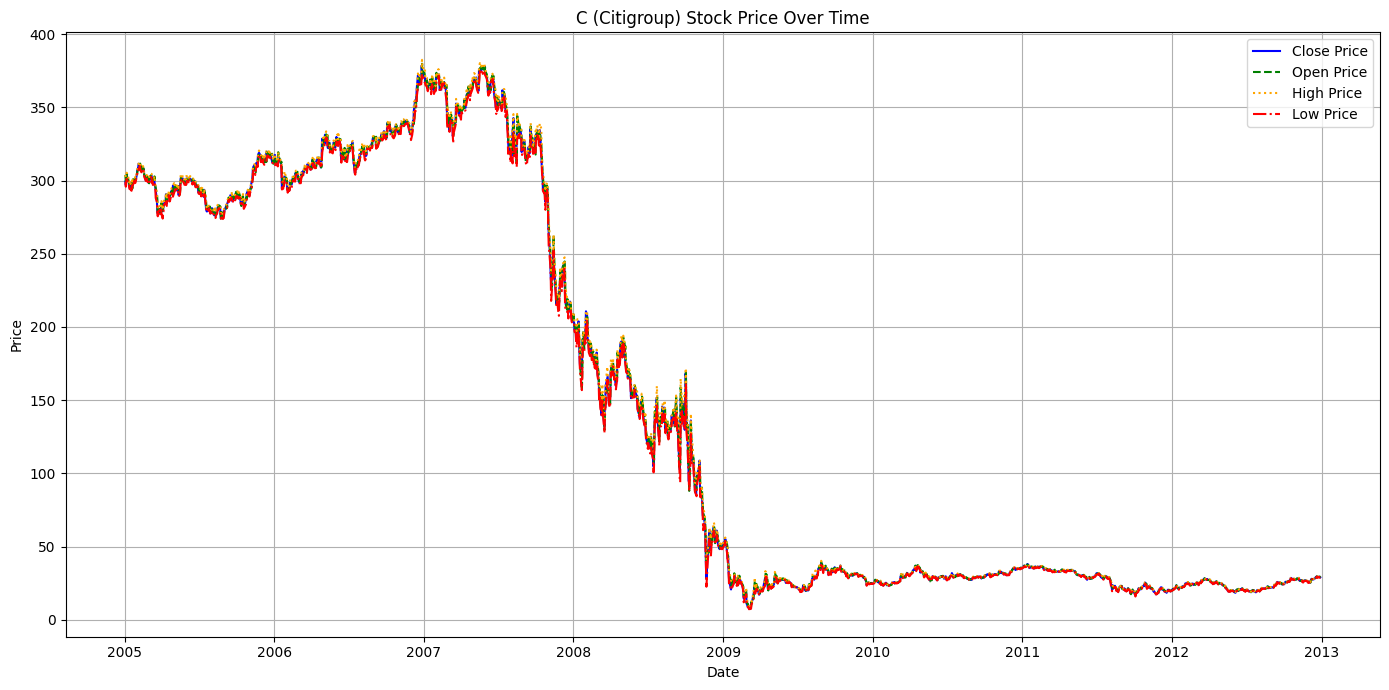

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(df_c.index, df_c['Close'], label='Close Price', color='blue')
plt.plot(df_c.index, df_c['Open'], label='Open Price', color='green', linestyle='--')
plt.plot(df_c.index, df_c['High'], label='High Price', color='orange', linestyle=':')
plt.plot(df_c.index, df_c['Low'], label='Low Price', color='red', linestyle='-.')

plt.title('C (Citigroup) Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## JPMorgan Chase & Co\.

In [34]:
csv_file_in_zip_JPM = "gfc data/JPM.csv"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_in_zip_JPM) as f:
        df_jpm = pd.read_csv(f)

df_jpm = df_jpm.iloc[2:].copy()
df_jpm.rename(columns={'Price': 'Date'}, inplace=True)

df_jpm['Date'] = pd.to_datetime(df_jpm['Date'])
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    df_jpm[col] = pd.to_numeric(df_jpm[col], errors='coerce')

df_jpm.dropna(subset=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], inplace=True)

df_jpm.set_index('Date', inplace=True)
display(df_jpm.head())

,Close,High,Low,Open,Volume
Date,,,,,
2005-01-03,22.368950,22.677485,22.288957,22.557499,14957900
2005-01-04,22.138395,22.513037,22.086522,22.466926,11360900
2005-01-05,22.184513,22.432351,22.126875,22.247912,9770200
2005-01-06,22.311308,22.466928,22.270962,22.345891,9115900
2005-01-07,22.132629,22.403522,22.126864,22.299775,9971200


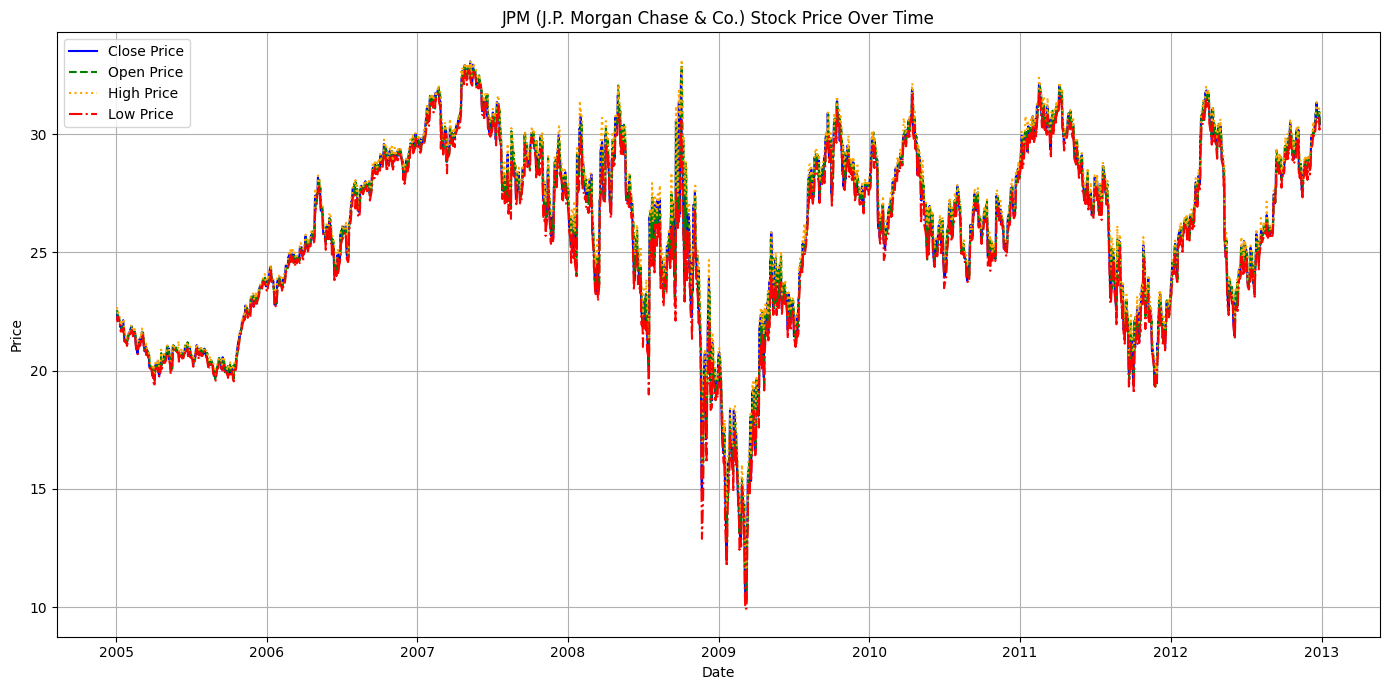

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(df_jpm.index, df_jpm['Close'], label='Close Price', color='blue')
plt.plot(df_jpm.index, df_jpm['Open'], label='Open Price', color='green', linestyle='--')
plt.plot(df_jpm.index, df_jpm['High'], label='High Price', color='orange', linestyle=':')
plt.plot(df_jpm.index, df_jpm['Low'], label='Low Price', color='red', linestyle='-.')

plt.title('JPM (J.P. Morgan Chase & Co.) Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Financial Sector Crisis Trend 

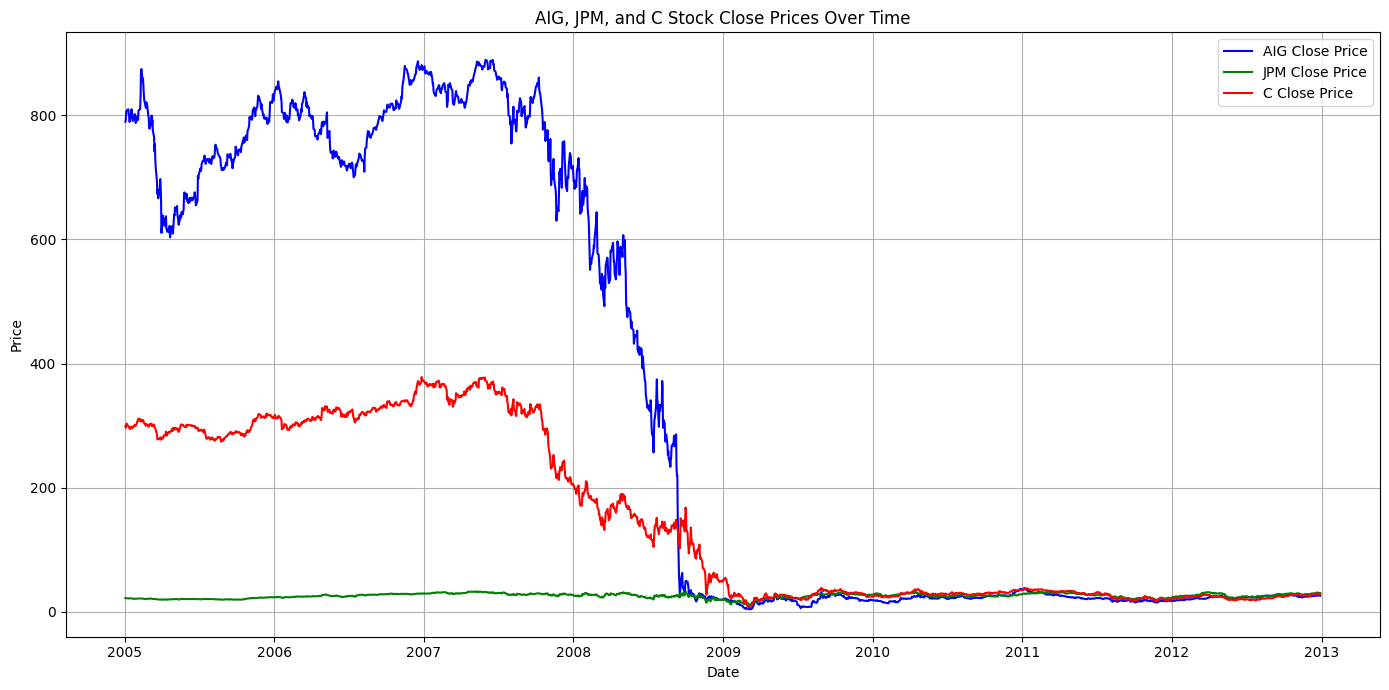

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(df_aig.index, df_aig['Close'], label='AIG Close Price', color='blue')
plt.plot(df_jpm.index, df_jpm['Close'], label='JPM Close Price', color='green')
plt.plot(df_c.index, df_c['Close'], label='C Close Price', color='red')

plt.title('AIG, JPM, and C Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Peak Price: $431.53 (Date: 2007-06-01)
Trough Price: $7.53 (Date: 2009-03-06)
Peak-to-Trough Decline: 98.25%


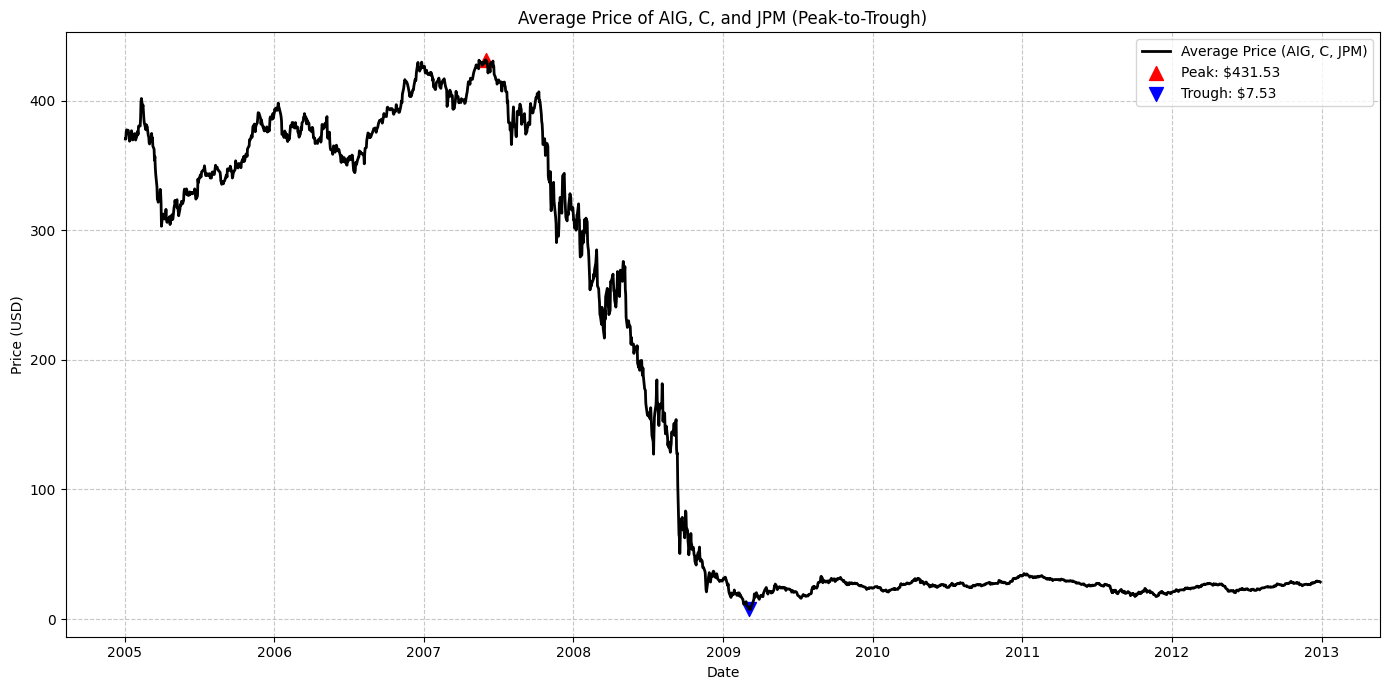

In [43]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

zip_file_path = "gfc.zip"

def load_stock_data(zip_obj, csv_path):
    with zip_obj.open(csv_path) as f:
        df = pd.read_csv(f)
    
    df = df.iloc[2:].copy()
    df.rename(columns={'Price': 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert numeric columns
    for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df.dropna(subset=['Date', 'Close'], inplace=True)
    df.set_index('Date', inplace=True)
    return df['Close']

with zipfile.ZipFile(zip_file_path, 'r') as z:
    aig_close = load_stock_data(z, "gfc data/AIG.csv")
    c_close = load_stock_data(z, "gfc data/C.csv")
    jpm_close = load_stock_data(z, "gfc data/JPM.csv")

stocks_df = pd.DataFrame({
    'AIG': aig_close,
    'C': c_close,
    'JPM': jpm_close
}).dropna() 

stocks_df['Average'] = stocks_df[['AIG', 'C', 'JPM']].mean(axis=1)

peak_val = stocks_df['Average'].max()
peak_date = stocks_df['Average'].idxmax()

post_peak_df = stocks_df.loc[peak_date:]
trough_val = post_peak_df['Average'].min()
trough_date = post_peak_df['Average'].idxmin()

# Compute Loss %
loss_pct = (peak_val - trough_val) / peak_val * 100

print(f"Peak Price: ${peak_val:.2f} (Date: {peak_date.date()})")
print(f"Trough Price: ${trough_val:.2f} (Date: {trough_date.date()})")
print(f"Peak-to-Trough Decline: {loss_pct:.2f}%")

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(stocks_df.index, stocks_df['Average'], label='Average Price (AIG, C, JPM)', color='black', linewidth=2)
plt.scatter(peak_date, peak_val, color='red', marker='^', s=100, label=f'Peak: ${peak_val:.2f}')
plt.scatter(trough_date, trough_val, color='blue', marker='v', s=100, label=f'Trough: ${trough_val:.2f}')

plt.title('Average Price of AIG, C, and JPM (Peak-to-Trough)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Broad Market Indicators

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

broad_market_files = {
    "S&P 500": "gfc data/^GSPC.csv",
    "Dow Jones Industrial Average": "gfc data/^DJI.csv"
}

volatility_files = {
    "CBOE Volatility Index (VIX)": "gfc data/^VIX.csv",
    "TED Spread": "gfc data/TEDRATE.csv",
    "3-Month Treasury Bill": "gfc data/WGS3MO.csv"
}

In [55]:
def load_and_clean_data(zip_path, csv_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(csv_path) as f:
            # Load CSV
            df = pd.read_csv(f)
            
    df = df.iloc[2:].copy()
    
    if 'Price' in df.columns:
        df.rename(columns={'Price': 'Date'}, inplace=True)
    
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Identify numeric columns (Close, Open, High, Low)
    cols_to_convert = [c for c in df.columns if c != 'Date']
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    # Drop rows with NaNs in critical columns
    df.dropna(subset=['Date'] + cols_to_convert, inplace=True)
    
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    
    return df

def plot_individual_chart(df, name, color_code):
    plt.figure(figsize=(14, 7))
    
    if 'Close' in df.columns:
        plt.plot(df.index, df['Close'], label='Close', color=color_code)
    
    if 'Open' in df.columns:
        plt.plot(df.index, df['Open'], label='Open', color='green', linestyle='--', alpha=0.5)
    if 'High' in df.columns:
        plt.plot(df.index, df['High'], label='High', color='orange', linestyle=':', alpha=0.5)
    if 'Low' in df.columns:
        plt.plot(df.index, df['Low'], label='Low', color='red', linestyle='-.', alpha=0.5)
        
    # If the file structure is different (e.g. only 'Value'), plot the first column
    if 'Close' not in df.columns and len(df.columns) > 0:
        col = df.columns[0]
        plt.plot(df.index, df[col], label=col, color=color_code)

    plt.title(f'{name} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value / Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_overall_chart(data_dict, group_title):
    plt.figure(figsize=(14, 7))
    
    for name, df in data_dict.items():
        if 'Close' in df.columns:
            normalized_series = (df['Close'] / df['Close'].iloc[0]) * 100
            plt.plot(df.index, normalized_series, label=name)
        elif len(df.columns) > 0:
            col = df.columns[0]
            normalized_series = (df[col] / df[col].iloc[0]) * 100
            plt.plot(df.index, normalized_series, label=name)
            
    plt.title(f'{group_title}: Normalized Comparison (Start=100)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


BROAD MARKET INDICATORS
Processing S&P 500...


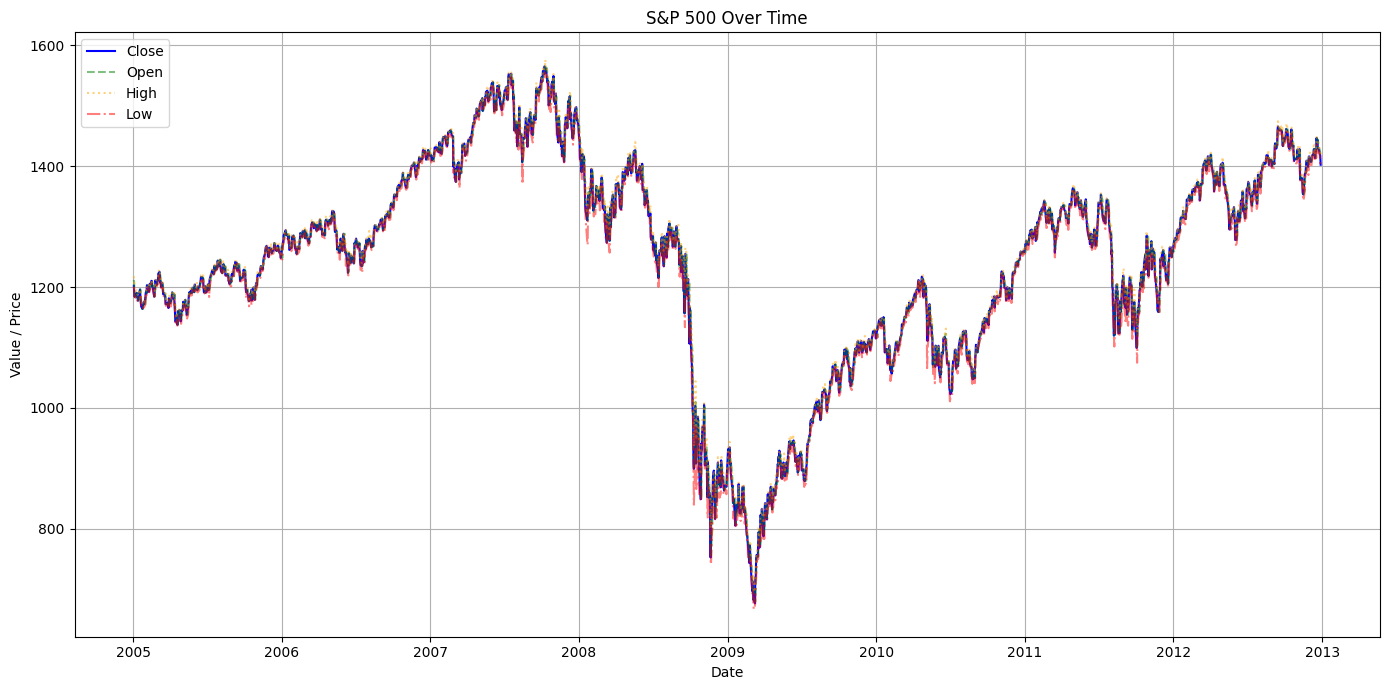

Processing Dow Jones Industrial Average...


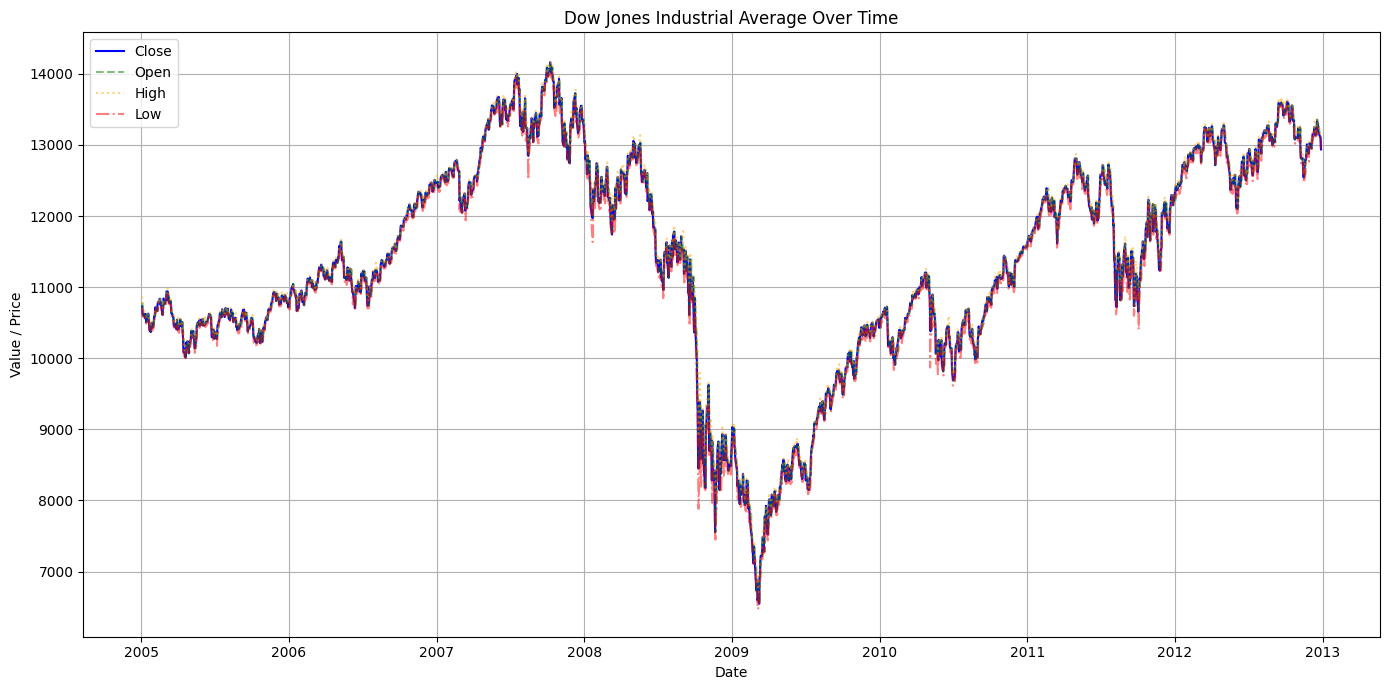

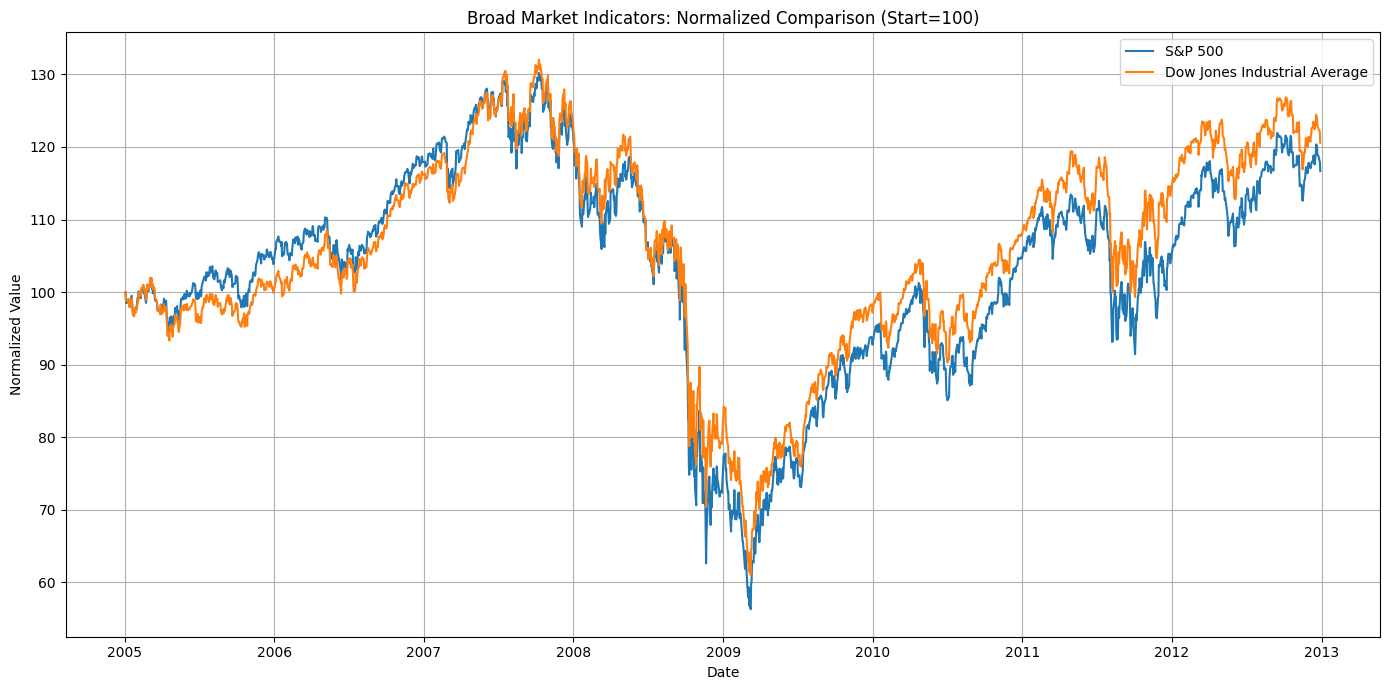

In [61]:
print("BROAD MARKET INDICATORS")
broad_market_data = {}

for name, file_path in broad_market_files.items():
    print(f"Processing {name}...")
    df = load_and_clean_data("gfc.zip", file_path)
    broad_market_data[name] = df
    plot_individual_chart(df, name, 'blue')

plot_overall_chart(broad_market_data, "Broad Market Indicators")

## Volatility, Liquidity, and Market Stress Indicators

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

volatility_files = {
    "CBOE Volatility Index (VIX)": "gfc data/^VIX.csv",
    "TED Spread": "gfc data/TEDRATE.csv",
    "3-Month Treasury Bill": "gfc data/WGS3MO.csv"
}

def load_volatility_data(zip_path, csv_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(csv_path) as f:
            df = pd.read_csv(f)

    df.columns = df.columns.str.strip()

    # Case A: Yahoo/Stock style (Has 'Price' column, usually metadata in first 2 rows)
    if 'Price' in df.columns:
        df = df.iloc[2:].copy()  # Drop metadata rows
        df.rename(columns={'Price': 'Date'}, inplace=True)
    # Case B: Standard/FRED style (Has 'DATE' or 'Date' column directly)
    elif 'DATE' in df.columns:
        df.rename(columns={'DATE': 'Date'}, inplace=True)
    # Ensure 'Date' column exists
    if 'Date' not in df.columns:
        # Fallback: Use the first column as Date
        df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    cols_to_convert = [c for c in df.columns if c != 'Date']
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    
    return df

ANALYZING: VOLATILITY, LIQUIDITY & STRESS
Processing CBOE Volatility Index (VIX)...


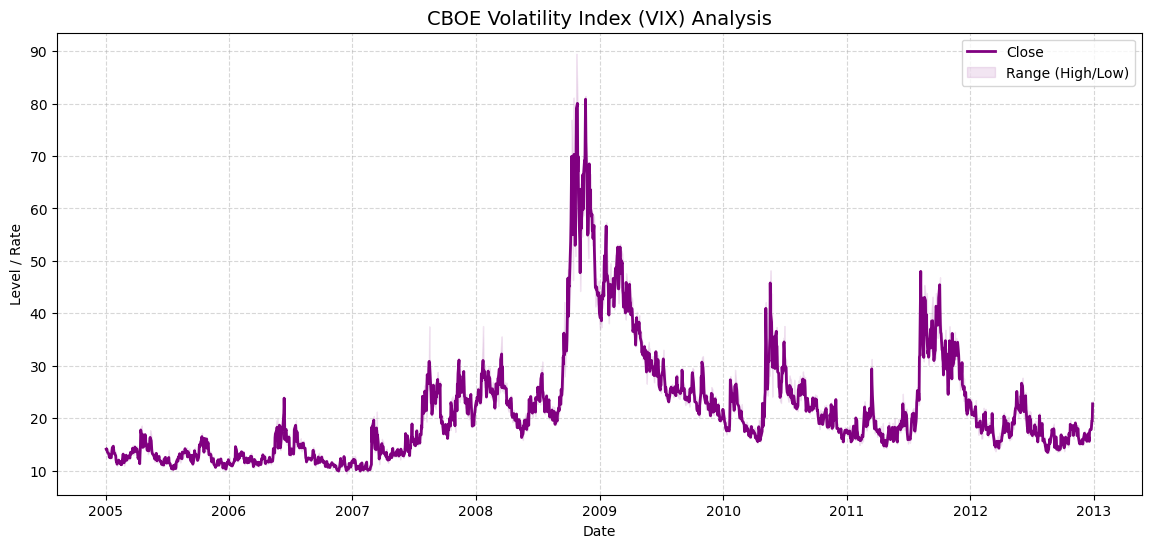

Processing TED Spread...


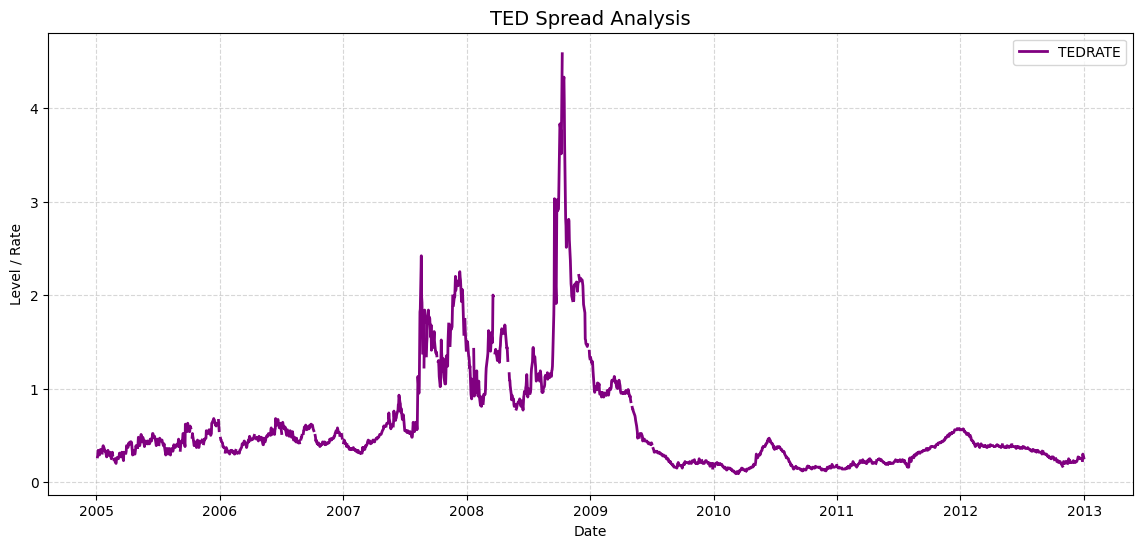

Processing 3-Month Treasury Bill...


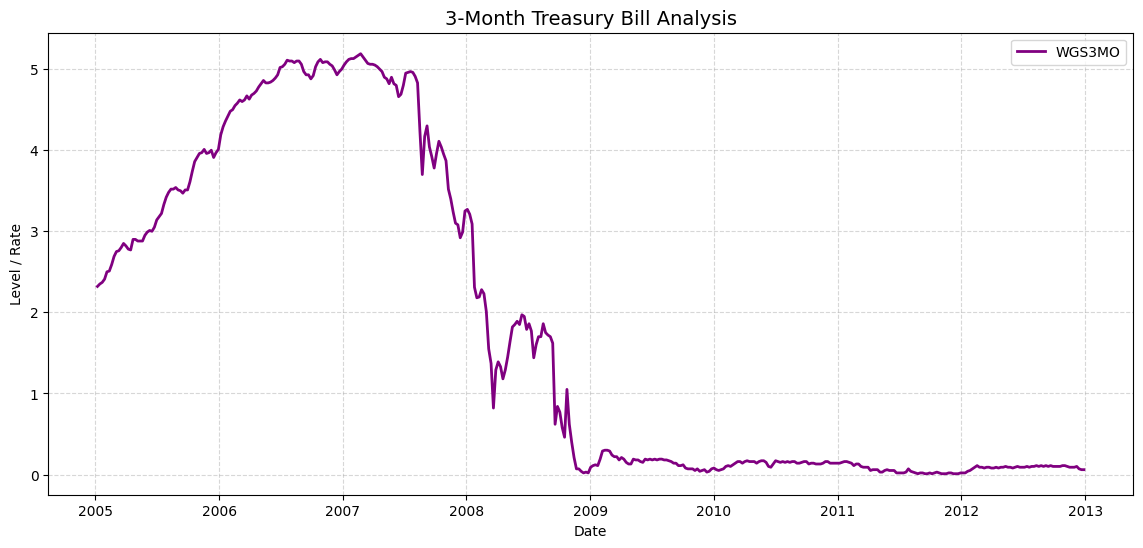

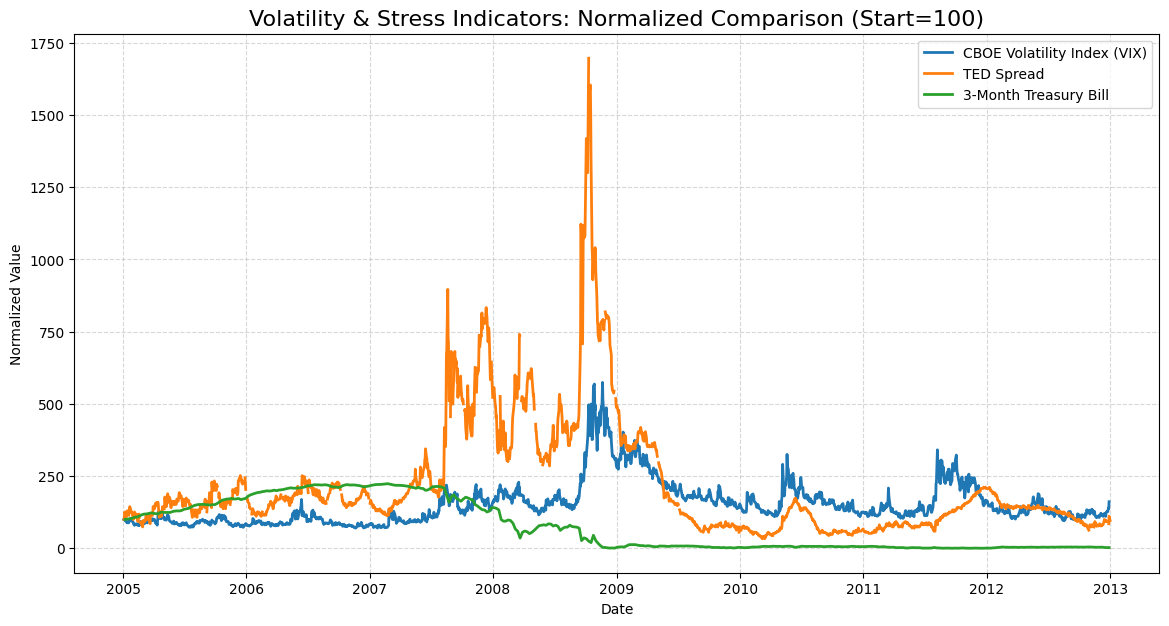

In [82]:
# Plotting Functions
def plot_individual_stress_chart(df, name):
    plt.figure(figsize=(14, 6))
    if 'Close' in df.columns:
        plt.plot(df.index, df['Close'], label='Close', color='#800080', linewidth=2) # Purple
        if 'High' in df.columns and 'Low' in df.columns:
             plt.fill_between(df.index, df['Low'], df['High'], color='#800080', alpha=0.1, label='Range (High/Low)')
    else:
        col = df.columns[0]
        plt.plot(df.index, df[col], label=col, color='#800080', linewidth=2)

    plt.title(f'{name} Analysis', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Level / Rate')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def plot_combined_stress_chart(data_dict):
    plt.figure(figsize=(14, 7))
    
    for name, df in data_dict.items():
        if 'Close' in df.columns:
            series = df['Close']
        else:
            series = df[df.columns[0]]
        first_valid_idx = series.first_valid_index()
        if first_valid_idx:
            base_val = series.loc[first_valid_idx]
            if base_val != 0:
                normalized_series = (series / base_val) * 100
                plt.plot(df.index, normalized_series, label=name, linewidth=2)
    
    plt.title('Volatility & Stress Indicators: Normalized Comparison (Start=100)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

print("ANALYZING: VOLATILITY, LIQUIDITY & STRESS")

stress_data_storage = {}

for name, file_path in volatility_files.items():
    print(f"Processing {name}...")
    try:
        df = load_volatility_data("gfc.zip", file_path)
        stress_data_storage[name] = df
        
        plot_individual_stress_chart(df, name)
        
    except Exception as e:
        print(f"Could not process {name}. Error: {e}")

if stress_data_storage:
    plot_combined_stress_chart(stress_data_storage)

## Equity loss of the institutions

In [85]:
import pandas as pd
import zipfile

files_to_analyze = {
    "Citigroup (C)": "gfc data/C.csv",
    "JPMorgan (JPM)": "gfc data/JPM.csv",
    "AIG (AIG)": "gfc data/AIG.csv",
    "S&P 500 (Market)": "gfc data/^GSPC.csv",
    "Dow Jones Industrial Average": "gfc data/^DJI.csv"
}

def calculate_crisis_loss(zip_path, file_map, start_date, end_date):
    results = []
    
    with zipfile.ZipFile(zip_path, 'r') as z:
        for name, csv_path in file_map.items():
            with z.open(csv_path) as f:
                # 1. Load Data
                df = pd.read_csv(f)
                df = df.iloc[2:].copy()

                # 2. Clean Data
                if 'Price' in df.columns:
                    df.rename(columns={'Price': 'Date'}, inplace=True)
                # Convert Date to datetime
                df['Date'] = pd.to_datetime(df['Date'])
                df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
                
                # 3. Filter by Expert Time Frame (The Crisis Window)
                mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
                crisis_data = df.loc[mask]
                if crisis_data.empty:
                    print(f"No data found for {name} in range.")
                    continue

                # 4. Identify Peak and Trough
                peak_price = crisis_data['Close'].max()
                peak_date = crisis_data.loc[crisis_data['Close'] == peak_price, 'Date'].iloc[0]
                trough_price = crisis_data['Close'].min()
                trough_date = crisis_data.loc[crisis_data['Close'] == trough_price, 'Date'].iloc[0]
                
                # 5. Calculate % Loss
                pct_loss = ((peak_price - trough_price) / peak_price) * 100
                results.append({
                    "Entity": name,
                    "Peak Date": peak_date.strftime('%Y-%m-%d'),
                    "Peak Price": peak_price,
                    "Trough Date": trough_date.strftime('%Y-%m-%d'),
                    "Trough Price": trough_price,
                    "% Loss": pct_loss
                })

    return pd.DataFrame(results)

df_losses = calculate_crisis_loss(
    zip_path="gfc.zip", 
    file_map=files_to_analyze, 
    start_date="2007-01-01", 
    end_date="2009-12-31"
)

# Display Formatted Results
pd.options.display.float_format = '{:.2f}'.format
print("FINANCIAL CRISIS LOSS ESTIMATION (2007-2009)")
print(df_losses.sort_values("% Loss", ascending=False).to_string(index=False))

FINANCIAL CRISIS LOSS ESTIMATION (2007-2009)
                      Entity  Peak Date  Peak Price Trough Date  Trough Price  % Loss
                   AIG (AIG) 2007-06-01      889.28  2009-03-05          4.40   99.51
               Citigroup (C) 2007-05-30      377.77  2009-03-05          7.57   98.00
              JPMorgan (JPM) 2007-05-09       33.07  2009-03-09         10.53   68.15
            S&P 500 (Market) 2007-10-09     1565.15  2009-03-09        676.53   56.78
Dow Jones Industrial Average 2007-10-09    14164.53  2009-03-09       6547.05   53.78


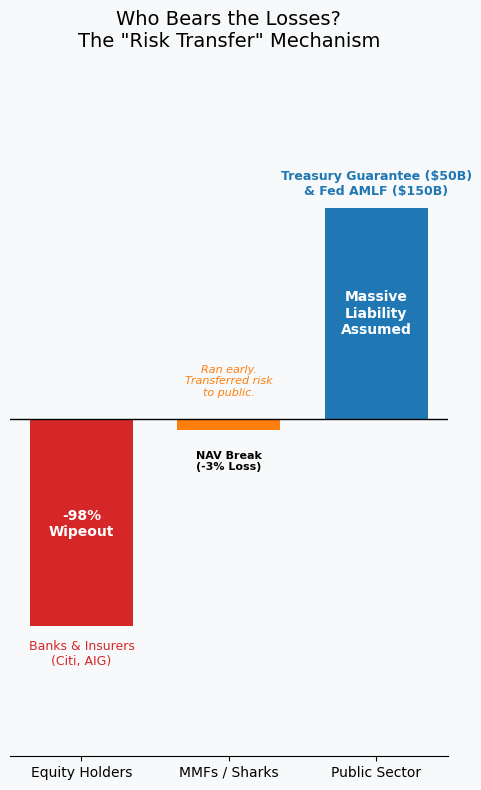

In [76]:
import matplotlib.pyplot as plt

categories = ['Equity Holders', 'MMFs / Sharks', 'Public Sector']
values = [-98, -5, 100]
colors = ['#d62728', '#ff7f0e', '#1f77b4']

x_pos = [0, 0.5, 1.0] 
bar_width = 0.35

fig, ax = plt.subplots(figsize=(5, 8))
bars = ax.bar(x_pos, values, color=colors, width=bar_width)
ax.axhline(0, color='black', linewidth=1)

# Bar 1: Equity Holders
ax.text(x_pos[0], -50, '-98%\nWipeout', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
ax.text(x_pos[0], -105, 'Banks & Insurers\n(Citi, AIG)', ha='center', va='top', fontsize=9, color='#d62728')

# Bar 2: MMFs / Sharks
ax.text(x_pos[1], -15, 'NAV Break\n(-3% Loss)', ha='center', va='top', fontsize=8, fontweight='bold')
ax.text(x_pos[1], 10, 'Ran early.\nTransferred risk\nto public.', ha='center', va='bottom', fontsize=8, style='italic', color='#ff7f0e')

# Bar 3: Public Sector
ax.text(x_pos[2], 50, 'Massive\nLiability\nAssumed', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
ax.text(x_pos[2], 105, 'Treasury Guarantee ($50B)\n& Fed AMLF ($150B)', ha='center', va='bottom', fontsize=9, fontweight='bold', color='#1f77b4')

ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=10)
ax.set_title('Who Bears the Losses?\nThe "Risk Transfer" Mechanism', 
             fontsize=14, 
             fontweight='normal', 
             family='sans-serif',
             pad=25)

ax.set_ylim(-160, 160)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([]) 

fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#f8f9fa')
plt.tight_layout()
plt.savefig('risk_transfer_tall.png')

"""
FIGURE ANALYSIS: 'Breaking the Buck' (The Psychological Cliff)

This chart visualizes the Net Asset Value (NAV) of the Reserve Primary Fund falling from $1.00 to $0.97 on Sept 16, 2008.

Why this 'small' drop caused a global panic:
1.  **The broken Promise:**
    - Unlike stocks, Money Market Funds (and Stablecoins) are marketed as 'risk-free' cash equivalents.
    - [cite_start]Investors treat them as savings accounts[cite: 552]. A drop to $0.97 is not just a 3% loss; it is a contract failure.

2.  **The Systemic Freeze:**
    - This 3% loss signaled that the underlying assets (Lehman Commercial Paper) were toxic.
    - [cite_start]Because no one knew which *other* funds held similar paper, the entire interbank lending market froze instantly[cite: 504].

3.  **Comparison to Terra (2022):**
    - This mirrors the initial de-peg of UST. When a stable asset trades at $0.99 or $0.98, the arbitrage mechanism is supposed to fix it.
    - When it fails to fix it, confidence evaporates, and the 'Run' becomes the only rational move for holders.
"""

<img src="image-20260207-202500.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42a08a8c-43b6-4a2a-913b-3581f661e4fd' target="_blank">

Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>